# PROBLEM STATEMENT

You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decide that a Linear Regression model might be a good candidate to solve this problem.  
Data set:
- Independant variable X: Outside Air Temperature
- Dependant variable Y: Overall daily revenue generated in dollars 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
dataset = pd.read_csv('dataset/IceCreamData.csv')

In [3]:
dataset.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [4]:
dataset.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352520
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [5]:
dataset.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# Data Visiualization

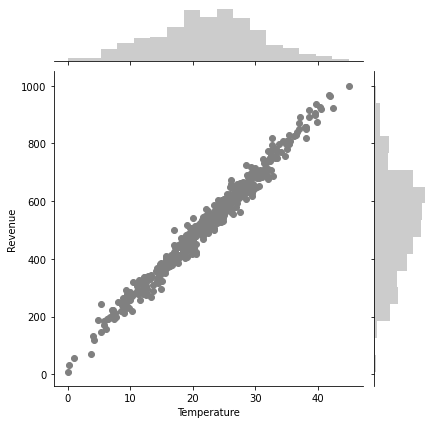

In [7]:
sns.jointplot(x = 'Temperature', y = 'Revenue', data = dataset, color = 'gray')

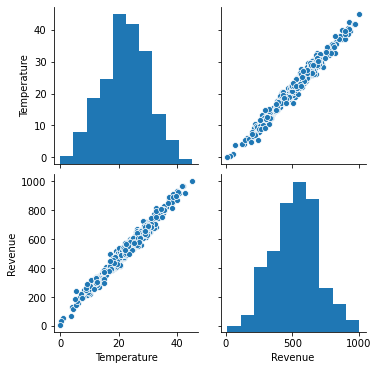

In [8]:
sns.pairplot(dataset)

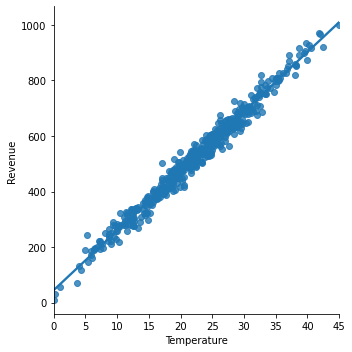

In [9]:
sns.lmplot(x = 'Temperature', y = 'Revenue', data = dataset)

# Create Train and Test Dataset

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = dataset[['Temperature']]
y = dataset['Revenue']

print(X, y)

     Temperature
0      24.566884
1      26.005191
2      27.790554
3      20.595335
4      11.503498
..           ...
495    22.274899
496    32.893092
497    12.588157
498    22.362402
499    28.957736

[500 rows x 1 columns] 0      534.799028
1      625.190122
2      660.632289
3      487.706960
4      316.240194
          ...    
495    524.746364
496    755.818399
497    306.090719
498    566.217304
499    655.660388
Name: Revenue, Length: 500, dtype: float64


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
print(X_train.shape, y_train.shape)

(400, 1) (400,)


In [14]:
print(X_test.shape, y_test.shape)

(100, 1) (100,)


# Train the Model 

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train)

LinearRegression()

In [16]:
print('Linear Coefficient (m)', model.coef_)
print('Linear Model Coefficient (b)', model.intercept_)

Linear Coefficient (m) [21.5133908]
Linear Model Coefficient (b) 43.73357869209326


# Test the Model 

Text(0.5, 1.0, 'Revenue Generated vs Temperature (Training Set)')

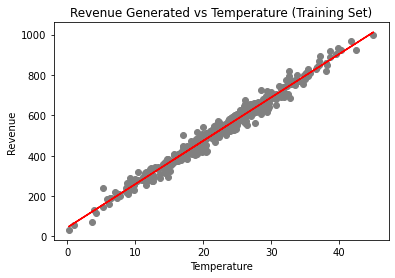

In [17]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Revenue')
plt.xlabel('Temperature')
plt.title('Revenue Generated vs Temperature (Training Set)')

Text(0.5, 1.0, 'Revenue Generated vs Temperature (Test Set)')

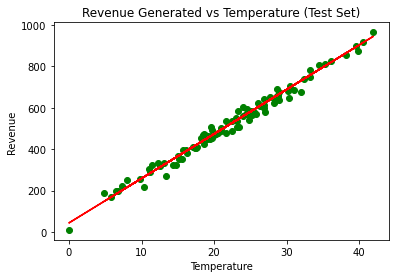

In [18]:
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, model.predict(X_test), color = 'red')
plt.ylabel('Revenue')
plt.xlabel('Temperature')
plt.title('Revenue Generated vs Temperature (Test Set)')